# Set + 1 : DescriptiveStatistics Probability

1. Plot the data, find the outliers and find out  μ,σ,σ^2

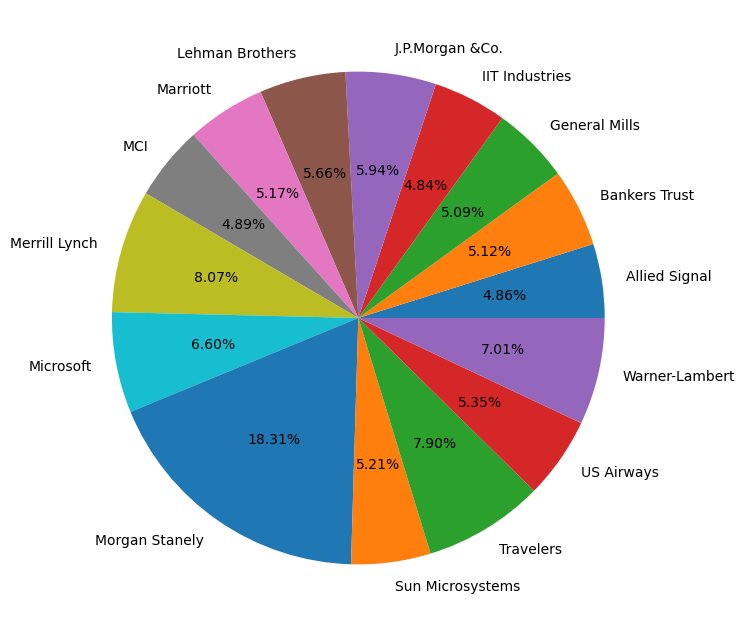

In [6]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
data=pd.Series([24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00])
names=["Allied Signal","Bankers Trust","General Mills","IIT Industries","J.P.Morgan &Co.","Lehman Brothers",
      "Marriott","MCI","Merrill Lynch","Microsoft","Morgan Stanely","Sun Microsystems","Travelers",
      "US Airways","Warner-Lambert"]
%matplotlib inline
fig=plt.figure(figsize=(8,8))
plt.pie(data,labels=names,autopct='%1.2f%%')
plt.show()

# Set + 4

3.	Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been $50 with a standard deviation of $40. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between $45 and $55. What is the probability that in any given week, there will be an investigation?

In [4]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as smf
mean = 50
std = 40
n = 100
d_f = 100 - 1 #degree of freedom
#the probability that there will be an investigation
#if the mean transactions amount increases more than 55 USD or less than 45 USD
#no investigation if the mean transactions amount remains between 45 to 55 USD
#we will go for t-distribution as population standard deviation is unknown
t_forty_five  = (45-50)/(40/np.sqrt(100))
t_fifty_five = (55-50)/(40/np.sqrt(100))
forty_five = stats.t.cdf(t_forty_five,df = d_f)
fifty_five = stats.t.cdf(t_fifty_five, d_f)
prob = fifty_five - forty_five
np.round(stats.t.interval(prob, d_f, mean,std/np.sqrt(n)),)
print('The probability that in any given week, there will be an investigation is',np.round((1-prob)*100,1),'%')


The probability that in any given week, there will be an investigation is 21.4 %


4.	The auditors from the above example would like to maintain the probability of investigation to 5%. Which of the following represents the minimum number transactions that they should sample if they do not want to change the thresholds of 45 and 55? Assume that the sample statistics remain unchanged.

In [5]:
x_bar = 45
s_std = 40
new = 50
t = np.round(stats.t.ppf(0.025, df = 249),2)
t
# t_value = (x_bar - new)/(sample_std/n**0.5)
# t=45-50 or z=55-50 z=+/- 5
# t=5/(40/n**0.5)
# n=(sample_standard_deviation*tscore)/(sample_mean=population_mean)
n=((s_std*abs(t)) / (5))**2
print('The Auditors would like to maintain the probability of investigation to 5%, they should sample', np.round(n,),'transactions if they do not want to change the thresholds of 45 to 55')
df = n-1
print(n,df)
np.round(stats.t.interval(0.95,df,new,scale = s_std/np.sqrt(n)),)

The Auditors would like to maintain the probability of investigation to 5%, they should sample 248.0 transactions if they do not want to change the thresholds of 45 to 55
248.3776 247.3776


array([45., 55.])